# Text Summarization

## Description

Document summarization is a standard task in Natural Language Processing which consists of creating a shortened version of given document (or collection of documents) while retaining the important information in them.

## Overview 

- Discussing  the need and types of Document Summarization
- Description of Text Summarization methods like TextRank and LexRank
- Applying TextRank and LexRank using Python 


## Pre-requisite

- Python 
- Basics of statisitics and NLP (knowledge of TFIDF, Cosine Similarity)

## Learning Outcomes

-  Determing the need and types of Document Summarization
- Understanding different Text Summarization algorithms like TextRank and LexRank
- Applying TextRank and LexRank using Python based libraries like gensim

## Chapter 1 - Introduction to Text Summarization

## Description
This chapter introduces the task of document summarization, mentioning its application in various real word stuations. We also discusses various type of summarization and describe the various stages  in the summarization. 

###  1.1  Need for Text Summarization

Summarization is an important Natural Language Processing task with wide range of practical use cases.  
Important application of summarization include the following:
- **Outlines** of Documents 
- **Abstracts** of Scientific Articles 
- **Headlines** of News Articles
- **Snippets** of Web pages for search engine results
- **Action Item** of Business Meeting
- **Summaries** of customer reviews

# 1.2 Types of Summarization

There are various types of Summarization,these methods can be divided based on type of documents,method of summary generation etc. 
Broadly Summarization methods are divided as follows :

- ** Based on Type of Input Documents : Single v/s Mutli-Document Summarization **

Summarization can be peroformed on a single document or collection of Multiple documents.
Creating abstract from a research article is an example of single document summarization whereas 
generating snippets from a collection of News Articles on a particular topic is a case of Multi-Document Summarization.

- ** Based on Technique  Summary Generation : Extractive v/s Abstractive Summarization ** 

Summarization methods can  be classified based on the method through which summary is generated.
If the summary is created by ** extracting ** important sentences from the original text then it is considered as ** Extractive Summarization **.

Instead of copying sentences from original document,if the summary is created by paraphrasing the important information in the input texts then it is called abstractive summarization. 
These abstractive techniques use sophisticated NLG (Natural Language Generation) Systems to generate sentences in the summary. 

- ** Based on Training Data - Supervised v/s Unsupervised Summarization ** 
Supervised Methods : These are created by applying standard supervised Machine Learning techniques and they require source texts and corresponding summaries for training the models.
Unsupervised Methods : They only consider source documents and apply unsupervised methods to extract summaries from them.
Since it is difficult to get training data consisting of both input text and corresponding most methods are based on unsupervised techniques i.e. they only use source documents as input. 


# 1.3  Stages of Summarization
Genrally text summarization systems are described by following three stages.They are as follows 

** 1. Content Selection : ** It is the processs of choosing sentences(any other units like clauses)from input documents for including it in the summary.

** 2. Information Ordering : ** Ordering and structuring the extracted units. 

** 3. Sentence Realization : ** Simplification of the extracted sentences.

All the extractive summarization methods need not consits of all the above three steps. Most of the extractive summarization methods consists only of first stage of content selection as they extract the sentences from input text in the chronological order.

# Chapter 2 - Methods of  Document Summarization 

## Description
In this chapter we will discuss the two most commonly used text summarization algorithms- TextRank and LexRank.
These are unsupervised extractive methods inspired by the Google's PageRank algorithm.
We will also see their application for sample inputs using gensim and lexrank libraries in Python. 

# Chapter 2.1 -  Intuition behind  Graph Based Algorithms 

Graph algorithms calculates the importance of a vertex based on the information recursively 
computed from the entire graph.
The linkage between vertex is considered as vote for that vertex
The strength of the vote given by a vertex is determined by the importance of the vertex itself.
In this way the score of each vertex is cacluated recursively over the entire graph.

# Pagerank Algorithm 
Pagerank is the most famous graph algorithm. It is primarily used in ranking webpages for online search results.It is named of it's inventor Larry Page.It is the basis of Graph based summarization algorithm like Textrank and Lexrank.

Webpages contains links to other webpages which is used to create a graph of all webpages.Webpages becomes vertex of the graph.

Following formula is used to calculate the Pagerank score of each webpage. It is ran iteratively until convergence to get final pagerank score.This score represents the probability that a user visits them.

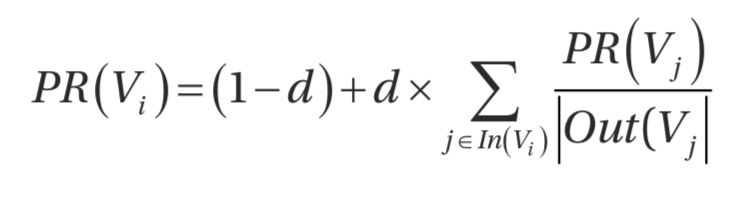

PR(Vi) = Pagerank of Vertex i

d = dampening factor between 0 to 1, usually it is set to 0.85

In(Vi) = Set of Pages pointing to vertex i

PR(Vj) = Pagerank of Vertex j which is one of the pages pointing to vertex i

|Out(Vj)| = Number of Pages to which Vertex i points to i.e. number of outgoing edges from vertex i


 # Visualizing Pagerank
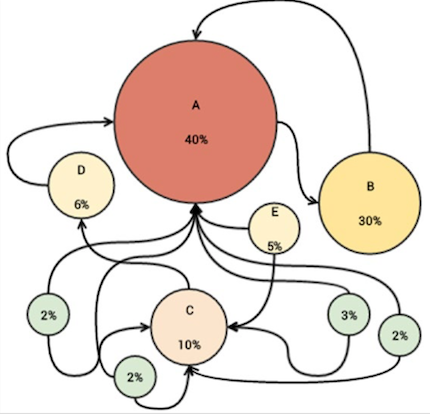

 Vertex B has a higher score than C, eventhough it has fewer edges than C,because A which is connected to B is more important than Vertices (like E)  connected to C.

# Application of Graph Algorithms to NLP Tasks
Graph based algorithms are increasingly applied to Natural Language Processing Tasks such as summarization,question answering etc. Generally it consists of following main steps :
 
1. Creating Vertices : Represent the text as graph by choosing appropriate textual units (Sentence,Clause,Keywords etc) as vertices in the graph.
2. Defining Edges : Identify relations between these textual units which becomes edges between the vertices.
3. Vertex weights  : Iterate graph based algorithm untill convergence.
4. Application : Sort vertices on the final score and select them based on the particular application.


**Defining Vertices ** : What counts as vertices depends on the particular application.For example during  sentence extraction sentences are considered as vertices but words are choosen as vertices for keyword extraction.

**Defining Edges ** : Edges can be weighted or unweighted similarly directed or undirectedly depending on the application. Graph algorithms for most NLP applications will have weighted edges where weights are calculated by similarity between vertices.

** Formula for calculating Vertex Weights ** : Following formula is used to calculate weights 
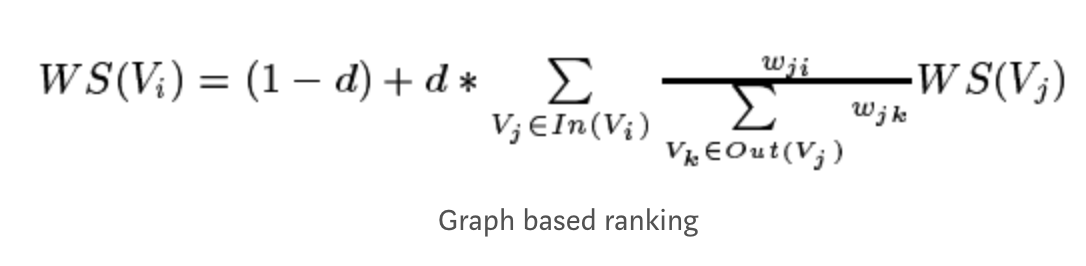
WS(Vi) = Weight of Vertex i

d = dampening factor between 0 to 1, usually it is set to 0.85

WS(Vj) = Weight of Vertex j, where vertex j in one of the incoming vertex

In(Vi) = set of incoming vertices to Vetex i 

Out(Vj) = set of outgoing vertices from Vertex j

wji = weight of the edge between vertex j and vertex i

wjk = weight of the edge between Vertex j and outgoing vertex k

The weight between the two Vertices (i, j) i.e. (wji) is divided by the sum of every weight(w) between the Vertices(j) and every outgoing Vertex  (wjk), this value is then multiplied by the weight of Vertex (j)

So the score of the vertex depends on the weights of the incoming vertex and relative weight of the edge connecting them.

After edge weights are defined vertex scores are upated by running the above formula.It is ran repeatedly until there is no significant change in updated vertex scores.

# Chapter 2.2 Graph based Algorithms for Text Summarization - TextRank and LexRank 




We will discuss the two main graph based algorithms applied for text summarization - TextRank and LexRank

# Chapter 2.2.1 - TextRank 

# Description of the TextRank Algorithm
TextRank is an unsupervised text summarization algorithm that extracts important sentences from the input text.It is applied to both tasks of keyword extraction and sentence extraction. 


**TextRank Algorithm  for Keyword Extraction  **

Keyword extraction is the task of selecting important words in the text that is representative of the entire text. 

step 1 : Creating Graph : Words are used as vertices of the text graph.Instead of selecting all words directly we can apply post-processing steps like lemmatization and filter based on parts of speech.

                  Sample Graph for Keyword Extraction 
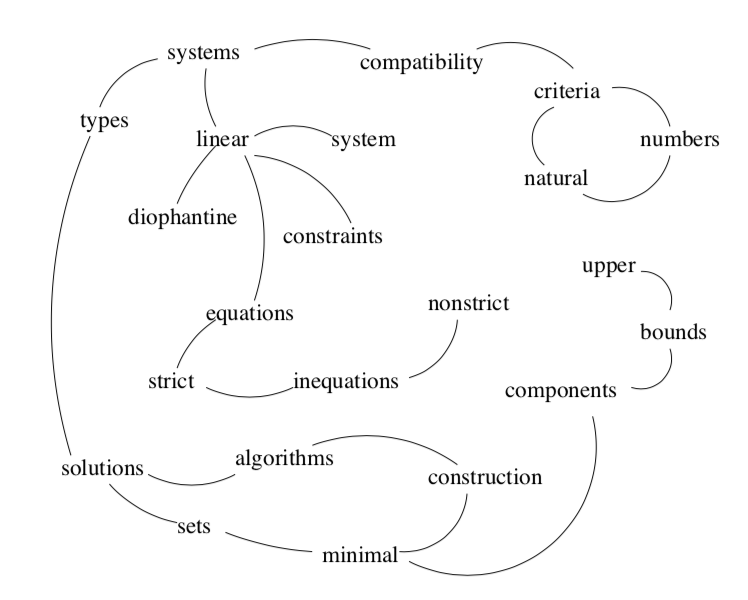


step 2: Edges Connecting vertices : Co-Occurence between the words is used to define relation between the words. Two vertices are related if there less than N words between there occurence in the text. N is a Parameter to the function.

step 3 : Obtaining Vertex Score : Intially score of all vertices is set to 1 and ranking algorithm is run for several iterations untill convergence to get final score.Generally threshold of 0.0001 is used for determing convergence. 


step 4 : Selection and post-processing : Top scored vertices are selected and post-processing steps are applied to merge adjacent keywords into a single multi-word keyword. 

 **TextRank Algorithm for Sentence Extraction **
 
Textrank is applied for document summarization where important sentences from the input text are extracted to form a summary of the input text. 
 
step 1 : Creating Graph :Text graph is created by considering individual sentences as vertices.

             Sample Graph for Sentence Extraction 
             
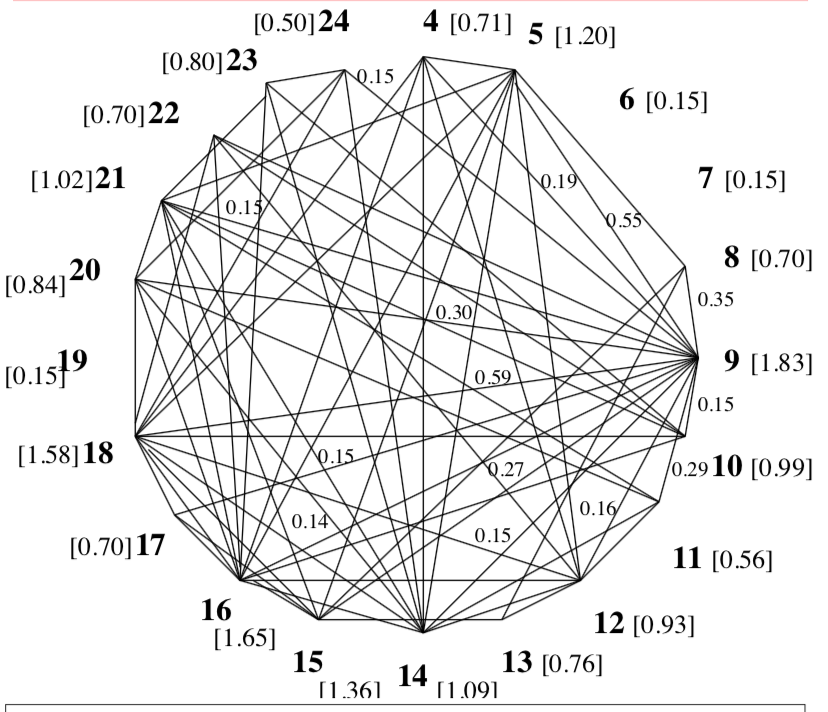

step 2: Edges Connecting vertices : Similarity between the sentences is determined by the number of common words between the sentences.Since different sentences will have different number of words similarity score is normalized by the number of total words in the sentence.

Similarity between two sentences Si and Sj is defined as follows:

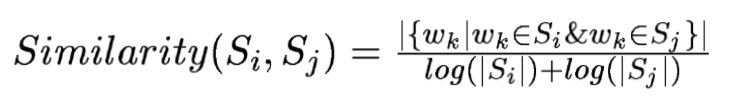

Here numerator refers to total number of common words between the sentences, denominator is sum of log of number of words in the sentences. 
Different measures like cosine similarity,longest common subsequence can also be used as similarity function.

step 3: Obtaining Final Score : Similar to Keyword Extraction Final Score is obtained by running the ranking algorithm  until convergence. 

step 4: Selection of Sentences: Sentences are sorted based on their score and top k sentences are selected. Number of sentences to be selected (parameter k) is an input to the function


# Implementation of TextRank in Python 

Above mentioned algorithm can be implemented in Python but there are already standard implmentation in **gensim** library of python.
** summarization ** module in Gensim provides the implementation of Textrank based keyowrd and Sentence extractor.

   ** Sentecene Extraction **

**from gensim.summarization.summarizer import summarize** : This Function implements Textrank for sentence extraction.

Input Parameters of the Function:	

1. text (str) – Given text.
2. ratio (float, optional) – Number between 0 and 1 that determines the proportion of the number of sentences of the original text to be chosen for the summary.
3. word_count (int or None, optional) – Determines how many words will the output contain. If both parameters are provided, the ratio will be ignored.
4. split (bool, optional) – If True, list of sentences will be returned. Otherwise joined strings will be returned.

Output Type returned by the Function:	

1. list of str – If split OR
2. str – Most representative sentences of given the text.


            ** Keyword Extraction **

** from gensim.summarization import keywords ** : This Function implements Textrank for Keyword Extraction.

Input Parameters of the Function:

1. text (str) – Input text.
2. ratio (float, optional) – If no “words” option is selected, the number of sentences is reduced by the provided ratio, else, the ratio is ignored.
3. words (int, optional) – Number of returned words.
4. split (bool, optional) – Whether split keywords if True.
5. scores (bool, optional) – Whether score of keyword.
6. pos_filter (tuple, optional) – Part of speech filters.
7. lemmatize (bool, optional) – If True - lemmatize words.
8. deacc (bool, optional) – If True - remove accentuation.

Output Type returned by the Function:

1. result (list of (str, float)) – If scores, keywords with scores OR
2. result (list of str) – If split, keywords only OR
3. result (str) – Keywords, joined by endl.


# Example of Textrank using the above Functions

# 1. Sentence Summarization 

In [51]:
# Install gensim if it not already installed 
#pip install gensim
# Import summarize function - 
from gensim.summarization.summarizer import summarize

# Input Text
text = '''
Rice Pudding - Poem by Alan Alexander Milne
What is the matter with Mary Jane?
She's crying with all her might and main,
And she won't eat her dinner - rice pudding again -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her dolls and a daisy-chain,
And a book about animals - all in vain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well, and she hasn't a pain;
But, look at her, now she's beginning again! -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her sweets and a ride in the train,
And I've begged her to stop for a bit and explain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well and she hasn't a pain,
And it's lovely rice pudding for dinner again!
What is the matter with Mary Jane?
'''

In [52]:
print text


Rice Pudding - Poem by Alan Alexander Milne
What is the matter with Mary Jane?
She's crying with all her might and main,
And she won't eat her dinner - rice pudding again -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her dolls and a daisy-chain,
And a book about animals - all in vain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well, and she hasn't a pain;
But, look at her, now she's beginning again! -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her sweets and a ride in the train,
And I've begged her to stop for a bit and explain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well and she hasn't a pain,
And it's lovely rice pudding for dinner again!
What is the matter with Mary Jane?



In [53]:
print(summarize(text))              

And she won't eat her dinner - rice pudding again -
I've promised her dolls and a daisy-chain,
I've promised her sweets and a ride in the train,
And it's lovely rice pudding for dinner again!


In [54]:
# List of strings instead of a single string
print (summarize(text, split=True))

["And she won't eat her dinner - rice pudding again -", "I've promised her dolls and a daisy-chain,", "I've promised her sweets and a ride in the train,", "And it's lovely rice pudding for dinner again!"]


# 2. Keyword Extraction

In [47]:
# keyowrds Function
from gensim.summarization import keywords

# Input Text
text = '''
Challenges in natural language processing frequently involve
speech recognition, natural language understanding, natural language
generation (frequently from formal, machine-readable logical forms),
connecting language and machine perception, dialog systems, or some
combination thereof.
'''

In [48]:
# Print the input text
print(text)


Challenges in natural language processing frequently involve
speech recognition, natural language understanding, natural language
generation (frequently from formal, machine-readable logical forms),
connecting language and machine perception, dialog systems, or some
combination thereof.



In [49]:
# Print Keywords
print(keywords(text))

natural language
machine
frequently


#       # Chapter 2.2.2 LexRank 

# Description of the LexRank Algorithm

Lexrank is also similar to textrank a graph based algorithm aplied for text summarization.
Main Steps in Lexrank are as follows 
Step 1 : Similar to Textrank graph is considered from input sentences as vertices. 

Step 2: Relation between vertices is defined by using TF-IDF similarity measure.sentences are initially converted to Bag of Words format and finally normalized into TF-IDF vectors. Cosine similarity between these tf-idf vectors are used for calculating similairty between the sentences i.e. weights of the edges between the vertices.  

Step 3 : Final score is calculated by running the ranking algorithm until convergence

Step 4: Sentence Selection : Sentences are sorted based on final score and top sentences are selected for summarization.


The main difference between Textrank and Lexrank is in the similarity function used to calculate the weights between the sentences. 


# Implementation of LexRank in Python

In [ ]:
#Lexrank algorithm is implmented in lexrank and sumy libraries of python. 

# Below is the implmentation using lexrank library 

# Installing lexrank library - If not already installed 

pip install lexrank

from lexrank import STOPWORDS, LexRank

sentences = [
    'One of David Cameron\'s closest friends and Conservative allies, '
    'George Osborne rose rapidly after becoming MP for Tatton in 2001.',

    'Michael Howard promoted him from shadow chief secretary to the '
    'Treasury to shadow chancellor in May 2005, at the age of 34.',

    'Mr Osborne took a key role in the election campaign and has been at '
    'the forefront of the debate on how to deal with the recession and '
    'the UK\'s spending deficit.',

    'Even before Mr Cameron became leader the two were being likened to '
    'Labour\'s Blair/Brown duo. The two have emulated them by becoming '
    'prime minister and chancellor, but will want to avoid the spats.',

    'Before entering Parliament, he was a special adviser in the '
    'agriculture department when the Tories were in government and later '
    'served as political secretary to William Hague.',

    'The BBC understands that as chancellor, Mr Osborne, along with the '
    'Treasury will retain responsibility for overseeing banks and '
    'financial regulation.',

    'Mr Osborne said the coalition government was planning to change the '
    'tax system \"to make it fairer for people on low and middle '
    'incomes\", and undertake \"long-term structural reform\" of the '
    'banking sector, education and the welfare state.',
]

# get summary with classical LexRank algorithm
summary = lxr.get_summary(sentences, summary_size=2, threshold=.1)
print(summary)

'''
 ['Mr Osborne said the coalition government was planning to change the tax '
  'system "to make it fairer for people on low and middle incomes", and '
  'undertake "long-term structural reform" of the banking sector, education and '
  'the welfare state.',
  'The BBC understands that as chancellor, Mr Osborne, along with the Treasury '
  'will retain responsibility for overseeing banks and financial regulation.']

'''

# get summary with continuous LexRank
summary_cont = lxr.get_summary(sentences, threshold=None)
print(summary_cont)

'''
 ['The BBC understands that as chancellor, Mr Osborne, along with the Treasury '
  'will retain responsibility for overseeing banks and financial regulation.']
  
'''

